In [1]:
## Packages
# data wrangling
import numpy as np
import pandas as pd
from scipy import stats
from dfply import *
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

In [2]:
print('pandas version', pd.__version__)
print('numpy version', np.__version__)

pandas version 1.0.4
numpy version 1.18.5


### Data Import

In [30]:
## read in data 
inpt = pd.read_csv("../../../raw_data/Train_Inpatientdata-1542865627584.csv")
outpt = pd.read_csv("../../../raw_data/Train_Outpatientdata-1542865627584.csv")
bene = pd.read_csv("../../../raw_data/Train_Beneficiarydata-1542865627584.csv")
flag = pd.read_csv("../../../raw_data/Train-1542865627584.csv")

In [52]:
inpt.dtypes

BeneID                             object
ClaimID                            object
ClaimStartDt               datetime64[ns]
ClaimEndDt                 datetime64[ns]
Provider                           object
InscClaimAmtReimbursed              int64
AttendingPhysician                 object
OperatingPhysician                 object
OtherPhysician                     object
AdmissionDt                datetime64[ns]
ClmAdmitDiagnosisCode              object
DeductibleAmtPaid                 float64
DischargeDt                datetime64[ns]
DiagnosisGroupCode                 object
ClmDiagnosisCode_1                 object
ClmDiagnosisCode_2                 object
ClmDiagnosisCode_3                 object
ClmDiagnosisCode_4                 object
ClmDiagnosisCode_5                 object
ClmDiagnosisCode_6                 object
ClmDiagnosisCode_7                 object
ClmDiagnosisCode_8                 object
ClmDiagnosisCode_9                 object
ClmDiagnosisCode_10               

### Data Wrangling

In [31]:
# convert date columns to date format
def col_to_date(df, col_list) :
    for x in col_list:
        df[x] = pd.to_datetime(df[x])
    return df

bene = col_to_date(bene, ['DOB','DOD'])
inpt = col_to_date(inpt, ['ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt'])
outpt = col_to_date(outpt, ['ClaimStartDt','ClaimEndDt'])

In [56]:
# calculate duration
inpt['ClaimDuration'] = inpt.ClaimEndDt - inpt.ClaimStartDt
inpt['HospitalDuration'] = inpt.DischargeDt - inpt.AdmissionDt
inpt['TotalPaid'] = inpt.DeductibleAmtPaid + inpt.InscClaimAmtReimbursed
outpt['ClaimDuration'] = outpt.ClaimEndDt - outpt.ClaimStartDt
outpt['TotalPaid'] = outpt.DeductibleAmtPaid + outpt.InscClaimAmtReimbursed


### imputatation

In [32]:
# impute empty codes with 0
print(inpt[inpt.columns[inpt.columns.str.contains(pat = 'Code')]].eq(0).any()) # check no code is currently 0

# fill NA codes with 0
# inpt.filter(like = 'Code', axis = 1)
code_col_inpt = inpt.columns[inpt.columns.str.contains(pat = 'Code')]
inpt[code_col_inpt] = inpt[code_col_inpt].fillna(0)
code_col_outpt = outpt.columns[outpt.columns.str.contains(pat = 'Code')]
outpt[code_col_outpt] = outpt[code_col_outpt].fillna(0)
outpt.head(4)

ClmAdmitDiagnosisCode    False
DiagnosisGroupCode       False
ClmDiagnosisCode_1       False
ClmDiagnosisCode_2       False
ClmDiagnosisCode_3       False
ClmDiagnosisCode_4       False
ClmDiagnosisCode_5       False
ClmDiagnosisCode_6       False
ClmDiagnosisCode_7       False
ClmDiagnosisCode_8       False
ClmDiagnosisCode_9       False
ClmDiagnosisCode_10      False
ClmProcedureCode_1       False
ClmProcedureCode_2       False
ClmProcedureCode_3       False
ClmProcedureCode_4       False
ClmProcedureCode_5       False
ClmProcedureCode_6       False
dtype: bool


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


### duplicated claim numbers

inpatient 40474 duplicate # 729
outpatient 517737 duplicate # 204899


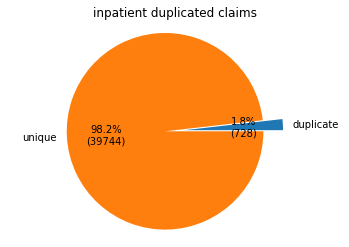

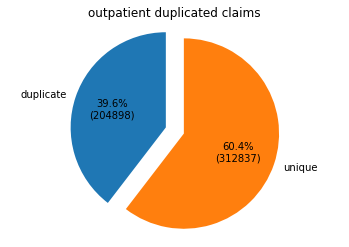

In [33]:
# duplicated claims
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                      'ClmDiagnosisCode_5','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_4',
                      'ClmAdmitDiagnosisCode']

# keep = first will mark all duplicates except the 1st occurrence
inpt_duplicate = inpt.duplicated(subset = code_for_duplicate, keep='first').sum()
print('inpatient', inpt.shape[0], 'duplicate #', inpt_duplicate)

outpt_duplicate = outpt.duplicated(subset = code_for_duplicate, keep='first').sum()
print('outpatient', outpt.shape[0], 'duplicate #', outpt_duplicate)

# keep = False, 'fist', 'last'
# use column index instead of column name?

# plot set up
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
labels = ['duplicate', 'unique']
explode = [0, 0.2]

# plots
pie_inpt = [inpt_duplicate, inpt.shape[0]-inpt_duplicate]
fig1, ax1 = plt.subplots()
ax1.pie(pie_inpt, explode = explode, labels = labels, 
        autopct = lambda pct: func(pct, pie_inpt), textprops = dict(color = 'black'))
ax1.axis('equal')
plt.title('inpatient duplicated claims')
# plt.show()
plt.savefig('../output/duplicate_inpatient.png')

pie_outpt = [outpt_duplicate, outpt.shape[0]-outpt_duplicate]
fig2, ax2 = plt.subplots()
ax2.pie(pie_outpt, explode = explode, labels = labels, startangle=90,
       autopct = lambda pct: func(pct, pie_outpt), textprops = dict(color = 'black'))
ax2.axis('equal')
plt.title('outpatient duplicated claims')
# plt.show()
plt.savefig('../output/duplicate_outpatient.png')
# autopct='%1.1f%%' for just percentage

## Q: if a code is NA is included as duplicates

### duplicate claim sources

In [89]:
# duplicate claim dataframe
inpt_dup = inpt_flag[inpt_flag.duplicated(subset = code_for_duplicate, keep=False)]
outpt_dup = outpt_flag[outpt_flag.duplicated(subset = code_for_duplicate, keep=False)]
inpt_dup.to_csv( '../output/inpatient_duplicate.csv')
outpt_dup.to_csv('../output/outpatient_duplicate.csv')
# keep = False will mark all duplicates

In [90]:
display(inpt_dup.columns)
display(outpt_dup.columns)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'PotentialFraud'],
      dtype='object')

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'PotentialFraud'],
      dtype='object')

,,,,Provider
ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmProcedureCode_1,ClmAdmitDiagnosisCode,
0,0,0.0,0,2284
4019,0,0.0,0,1258
4011,0,0.0,0,1148


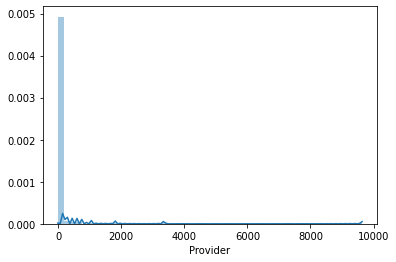

In [101]:
# providers
# display(inpt_dup[code_for_duplicate].nunique())
# display(pd.DataFrame(inpt_dup.groupby(code_for_duplicate).Provider.count()))

# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '0389'])
# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '0030'])
# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '185'].sort_values(by = 'ClmDiagnosisCode_1'))
# display(inpt_dup[inpt_dup['ClmDiagnosisCode_1'] == '7224'].sort_values(by = 'ClmDiagnosisCode_1'))

code_for_duplicate_short = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                            'ClmProcedureCode_1','ClmAdmitDiagnosisCode']
# ## inpatient
# dup_provider_inpt = pd.DataFrame(inpt_dup.groupby(code_for_duplicate_short).\
#                             Provider.nunique().sort_values(ascending = False))
# display(dup_provider_inpt.head(3))
# # plot
# provider_count_inpt = pd.DataFrame(dup_provider_inpt.Provider.value_counts()).sort_index().\
#                         reset_index().rename(columns={'index':'number'}).sort_values(by = 'number')
# k = sns.barplot(x = 'number', y = 'Provider', data = provider_count_inpt)

# for index, row in provider_count_inpt.iterrows():
#     k.text(row.name,row.Provider, row.Provider, color='black', ha="center")
# plt.title('Inpatient Duplicated Claims Provider Numbers')
# plt.show()
# plt.savefig('../output/inpatient_duplicate_claim_provider_num.png')

## outpatient
# groupby automatically exclude NA
dup_provider_outpt = pd.DataFrame(outpt_dup.groupby(code_for_duplicate_short).\
                            Provider.nunique().sort_values(ascending = False))
display(dup_provider_outpt.head(3))
# plot
provider_count_outpt = pd.DataFrame(dup_provider_outpt.Provider.value_counts()).sort_index().\
                        reset_index().rename(columns={'index':'number'}).sort_values(by = 'number')
# g = sns.bar(x = 'number', y = 'Provider', data = provider_count_outpt)
g = sns.distplot(provider_count_outpt['Provider'])
# for index, row in provider_count_outpt.iterrows():
#     g.text(row.name,row.Provider, row.Provider, color='black', ha="center")
# plt.title('Outpatient Duplicated Claims Provider Numbers')
# plt.show()
# # introduce fraudulant flag
# plt.savefig('../output/outpatient_duplicate_claim_provider_num.png')

(array([209.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000e+00, 9.6380e+02, 1.9266e+03, 2.8894e+03, 3.8522e+03,
        4.8150e+03, 5.7778e+03, 6.7406e+03, 7.7034e+03, 8.6662e+03,
        9.6290e+03]),
 <a list of 10 Patch objects>)

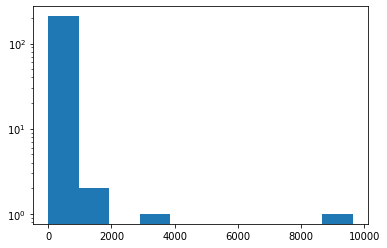

In [109]:
plt.hist(x = provider_count_outpt['Provider'], log = True)

In [108]:
provider_count_outpt.sort_values(by = 'Provider', ascending = False).iloc[]

,number,Provider
1,2,9629
2,3,3362
3,4,1789
4,5,1075
5,6,765


### information provider & receivers

In [46]:
print(inpt.Provider.nunique())
print(flag.Provider.nunique())

2092
5410


### Merge with Fraud Flag

In [50]:
inpt_flag = inpt.merge(flag, on = 'Provider')
outpt_flag = outpt.merge(flag, on = 'Provider')

In [86]:
inpt_flag.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'PotentialFraud'],
      dtype='object')

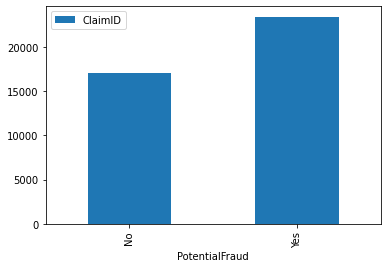

In [63]:
inpt_flag.groupby('PotentialFraud').count().plot(y = 'ClaimID', use_index = True, kind = 'bar')

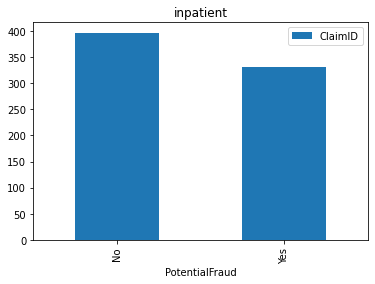

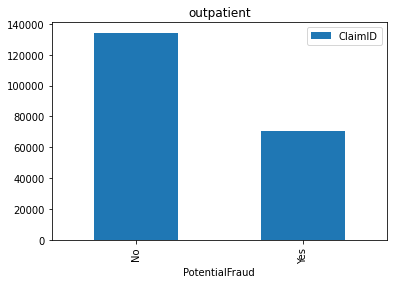

In [82]:
# duplicated claims
code_for_duplicate = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                      'ClmDiagnosisCode_5','ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_4',
                      'ClmAdmitDiagnosisCode']

# # keep = first will mark all duplicates except the 1st occurrence
# inpt_duplicate_flag = inpt_flag.duplicated(subset = code_for_duplicate, keep='first').sum()
# print('inpatient', inpt.shape[0], 'duplicate #', inpt_duplicate)

# outpt_duplicate_flag = outpt_flag.duplicated(subset = code_for_duplicate, keep='first').sum()
# print('outpatient', outpt.shape[0], 'duplicate #', outpt_duplicate)

inpt_flag[inpt_flag.duplicated(subset = code_for_duplicate, keep='first')].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'inpatient')
plt.savefig('../output/duplicateclaims_flag_inpatient.png')

outpt_flag[outpt_flag.duplicated(subset = code_for_duplicate, keep='first')].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'outpatient')
plt.savefig('../output/duplicateclaims_flag_outpatient.png')

inpatient duplicate 5919
outpatient duplicate 323119


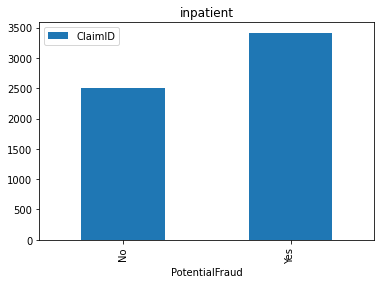

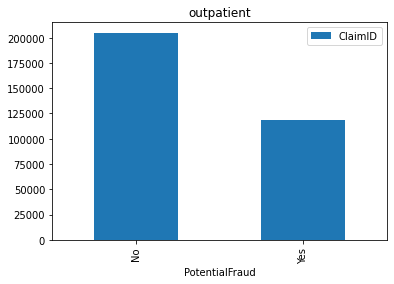

In [114]:
code_for_duplicate_short = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
                            'ClmProcedureCode_1','ClmAdmitDiagnosisCode']

inpt_dup_flag_short = inpt_flag.duplicated(subset = code_for_duplicate_short, keep= False)
print('inpatient duplicate', inpt_dup_flag_short.sum())
inpt_flag[inpt_dup_flag_short].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'inpatient')

outpt_dup_flag_short = outpt_flag.duplicated(subset = code_for_duplicate_short, keep=False)
print('outpatient duplicate', outpt_dup_flag_short.sum())
outpt_flag[outpt_dup_flag_short].groupby('PotentialFraud').count().\
    plot(y = 'ClaimID', use_index = True, kind = 'bar', title = 'outpatient')

### physicians

In [132]:
code_for_duplicate_short

['ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmProcedureCode_1',
 'ClmAdmitDiagnosisCode']

In [148]:
inpt_flag_dup_doctor = inpt_flag[inpt_dup_flag_short].groupby(['ClmDiagnosisCode_1','ClmDiagnosisCode_2',
        'ClmProcedureCode_1','ClmAdmitDiagnosisCode','PotentialFraud']).AttendingPhysician.nunique()
inpt_flag_dup_doctor

ClmDiagnosisCode_1  ClmDiagnosisCode_2  ClmProcedureCode_1  ClmAdmitDiagnosisCode  PotentialFraud
0030                27651               9904.0              27651                  Yes                2
0031                42833               0.0                 7907                   No                 1
                                                                                   Yes                1
00845               2449                0.0                 78900                  No                 1
                                                                                   Yes                1
                    27651               0.0                 78791                  Yes                4
                    36250               0.0                 78791                  Yes                2
                    4019                0.0                 78791                  No                 1
                                                                      

In [151]:
pd.DataFrame(inpt_flag_dup_doctor).sort_values(by = "AttendingPhysician", ascending = False)

AttendingPhysician
ClmDiagnosisCode_1 ClmDiagnosisCode_2 ClmProcedureCode_1 ClmAdmitDiagnosisCode PotentialFraud                    
V5789              4019               0.0                V5789                 Yes                             16
                   5990               0.0                V5789                 Yes                             16
486                4019               0.0                486                   Yes                             14
49121              4019               0.0                49121                 Yes                             13
486                4019               0.0                486                   No                              13
V5789              4019               0.0                V5789                 No                              13
78659              4019               0.0                78650                 No                              12
71536              4019               8154.0             71536                 Yes                             12
7802               4019               0.0                7802                  Yes                             11
486                25000              0.0                486                   Yes                             11
43310              4019               3812.0             43310                 Yes                             11
                                                                               No                              10
71536              4019               8154.0             71536                 No                              10
486                496                0.0                486                   No                              10
                   4280               0.0                486                   Yes                             10
5990               4019               0.0                5990                  No                              10
486                4280               0.0                486                   No                              10
                   27651              0.0                486                   Yes                             10
5990               25000              0.0                5990                  No                               9
42731              4019               0.0                42731                 Yes                              9
5770               4019               0.0                5770                  No                               9
486                2724               0.0                486                   Yes                              9
4280               25000              0.0                4280                  Yes                              8
486                41401              0.0                486                   No                               8
78659              4019               0.0                78650                 Yes                              8
486                25000              0.0                486                   No                               8
4280               4019               0.0                4280                  Yes                              8
V5789              25000              0.0                V5789                 Yes                              8
486                496                0.0                486                   Yes                              8
49121              4280               0.0                49121                 Yes                              8
486                42731              0.0                486                   Yes                              8
78659              2724               0.0                78650                 No                               7
                   496                0.0                78650                 Yes                              7
49121              41401              0.0                49121                 Yes                       

(array([1837., 1370.,   77.,   67.,   15.,   13.,   10.,    2.,    4.,
           2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

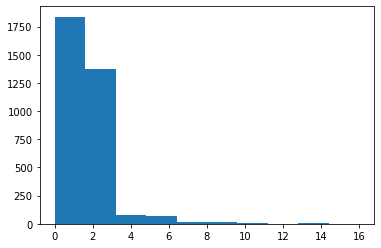

In [141]:
plt.hist(pd.DataFrame(inpt_flag_dup_doctor)['AttendingPhysician'])